In [1]:
#1
import pandas as pd

df = pd.read_csv("/content/AWCustomers.csv")

# (a)
features = ["BirthDate","Education","Occupation","Gender","MaritalStatus",
            "HomeOwnerFlag","NumberCarsOwned","TotalChildren","YearlyIncome","CountryRegionName"]

# (b)
new_df = df[features].copy()
new_df["BirthDate"] = pd.to_datetime(new_df["BirthDate"], errors="coerce")
new_df["Age"] = 2025 - new_df["BirthDate"].dt.year
new_df = new_df.drop(columns=["BirthDate"])

# (c)
dtype_map = {
    "Age":"Continuous-Ratio",
    "Education":"Categorical-Ordinal",
    "Occupation":"Categorical-Nominal",
    "Gender":"Categorical-Nominal",
    "MaritalStatus":"Categorical-Nominal",
    "HomeOwnerFlag":"Discrete-Nominal",
    "NumberCarsOwned":"Discrete-Ratio",
    "TotalChildren":"Discrete-Ratio",
    "YearlyIncome":"Continuous-Ratio",
    "CountryRegionName":"Categorical-Nominal"
}

print(new_df.head())
print(pd.DataFrame(list(dtype_map.items()), columns=["Attribute","DataType"]))

         Education      Occupation Gender MaritalStatus  HomeOwnerFlag  \
0        Bachelors        Clerical      M             M              1   
1  Partial College        Clerical      M             M              1   
2        Bachelors        Clerical      F             S              0   
3  Partial College  Skilled Manual      M             M              1   
4  Partial College  Skilled Manual      M             S              1   

   NumberCarsOwned  TotalChildren  YearlyIncome CountryRegionName  Age  
0                3              1         81916         Australia   38  
1                2              2         81076            Canada   53  
2                3              0         86387     United States   40  
3                2              2         61481    United Kingdom   48  
4                1              0         51804           Germany   50  
           Attribute             DataType
0                Age     Continuous-Ratio
1          Education  Categorical

In [2]:
#2
import pandas as pd
from scipy import stats


df1 = pd.read_csv("/content/AWCustomers.csv")
df2 = pd.read_csv("/content/AWSales.csv")

data = pd.merge(df1, df2, on="CustomerID")

buyers = data[data["BikeBuyer"]==1]["YearlyIncome"]
non_buyers = data[data["BikeBuyer"]==0]["YearlyIncome"]


t_stat, p_val = stats.ttest_ind(buyers, non_buyers, equal_var=False)

print("Buyers Avg Income:", buyers.mean())
print("Non-Buyers Avg Income:", non_buyers.mean())
print("t-statistic:", t_stat, "p-value:", p_val)

Buyers Avg Income: 79653.9687099003
Non-Buyers Avg Income: 64261.98687727825
t-statistic: 34.66506577136011 p-value: 1.6144591507443587e-254


In [7]:
df1.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated'],
      dtype='object')

In [4]:
df2.head()

,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


In [10]:
df3 = pd.read_csv("/content/bike_buyers.csv")
df3.head()
df3.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [14]:
df3.columns = df3.columns.str.strip()

# Convert to numeric 1/0
df3["Purchased Bike"] = df3["Purchased Bike"].replace({
    "Yes": 1, "No": 0,
    "Y": 1,  "N": 0,
    "True": 1, "False": 0,
    "Purchased": 1, "Not Purchased": 0
}).astype(int)


In [15]:
commute_bike_pct = (
    df3.groupby("Commute Distance")["Purchased Bike"]
    .mean()
    .reset_index(name="Purchase Percentage")
)

commute_bike_pct["Purchase Percentage"] *= 100
print(commute_bike_pct)


  Commute Distance  Purchase Percentage
0        0-1 Miles            54.644809
1        1-2 Miles            45.562130
2        10+ Miles            29.729730
3        2-5 Miles            58.641975
4       5-10 Miles            39.583333


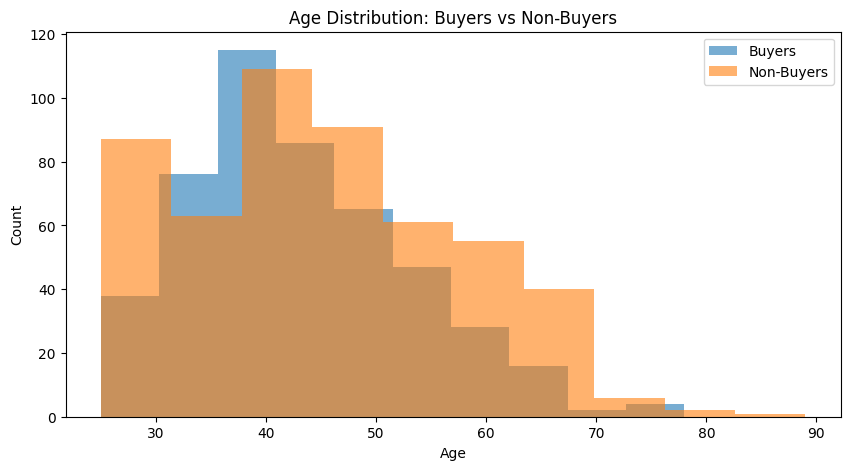

In [16]:
#4
import matplotlib.pyplot as plt

buyers = df3[df3["Purchased Bike"] == 1]["Age"]
non_buyers = df3[df3["Purchased Bike"] == 0]["Age"]

plt.figure(figsize=(10,5))
plt.hist(buyers, alpha=0.6, label="Buyers")
plt.hist(non_buyers, alpha=0.6, label="Non-Buyers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution: Buyers vs Non-Buyers")
plt.legend()
plt.show()


In [18]:
#5

# prepare df1 marital status info
df1_small = df1[["CustomerID", "MaritalStatus"]]

# merge with df2 for BikeBuyer info
merged = df1_small.merge(df2[["CustomerID", "BikeBuyer"]], on="CustomerID", how="inner")

# proportion of buyers within each marital status
marital_prop = (
    merged.groupby("MaritalStatus")["BikeBuyer"]
    .mean()
    .reset_index(name="Buyer Proportion")
)

marital_prop["Buyer Proportion"] *= 100  # convert to %
print("\nProportion of Bike Buyers by Marital Status:")
print(marital_prop)



Proportion of Bike Buyers by Marital Status:
  MaritalStatus  Buyer Proportion
0             M         63.838343
1             S         44.937010
